In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import glob
import scipy.io
import math
import matplotlib

def find_consecutive(input_list, min_consecutive_length):
    """
    Finds the consecutive elements in a list that have a length greater than or equal to min_consecutive_length.
    """
    consecutives = []
    for i, e in enumerate(input_list):
        if i == 0 or input_list[i - 1] != (e - 1):
            j = i + 1
            consecutive = [e]

            while j < (len(input_list)) and input_list[j] == (input_list[j-1] + 1):
                consecutive.append(input_list[j])
                j += 1
            if len(consecutive) >= min_consecutive_length:
                consecutives.append(consecutive)
    return consecutives

def beg_and_end(lst):
    """
    Returns the first and last element of a given list.
    
    Parameters:
    lst (list): The list for which the first and last element are to be returned.
    
    Returns:
    tuple: A tuple containing the first and last element of the list.
    
    Raises:
    TypeError: If the input is not a list.
    ValueError: If the input list is empty.
    """
    if not isinstance(lst, list):
        raise TypeError("Input must be a list.")
    if not lst:
        raise ValueError("Input list must not be empty.")
    return lst[0], lst[-1]

def get_point_number(point):
    """
    Extracts the point number from the point string.
    """
    return point[5:].lstrip("0") or "0"

def find_moults(trajectory, moult_value=1, min_width=8):
    """
    Finds the potential moults in a given trajectory based on the specified moult value and minimum width (corresponding to the minimum duration of the moult in timepoints).
    
    Parameters:
        trajectory (ndarray): The trajectory data to search for moults.
        moult_value (int, optional): The value in the trajectory data that indicates a potential moult. Defaults to 1.
        min_width (int, optional): The minimum number of consecutive points with the moult value required for it to be considered a moult. Defaults to 8.
    
    Returns:
        list: A list of lists containing the indices of the start and end of each potential moult.
    """
    if min_width < 2:
        raise ValueError("min_width must be at least 2.")
    
    potential_moults = np.argwhere(trajectory == moult_value).squeeze().tolist()

    if not type(potential_moults) == int:
        consecutives = find_consecutive(potential_moults, min_width)
        consecutives = sorted(consecutives, key=lambda x: x[0], reverse=False)

        if len(consecutives) <= 4:
            return consecutives
        else:
            return consecutives[0:4]
    else:
        return []



df = pd.read_csv("./moults.csv")

df = df.sort_values(['Point', 'Time'], ascending=[True, True])

output_dataframe = pd.DataFrame(columns=["Point", "beg_moult1", "end_moult1", "beg_moult2", "end_moult2", "beg_moult3", "end_moult3", "beg_moult4", "end_moult4"])
for point in np.unique(df['Point']):
    print(point)
    point_line = [point]
    traj = df.loc[df['Point']==point]['moulting'].to_numpy()
    clean_traj = signal.medfilt(traj, 5)

    moults = find_moults(clean_traj)
    beg_end_moults = []
    for l in moults:
        beg_end_moults.append(beg_and_end(l))

    while len(beg_end_moults) < 4:
        beg_end_moults.append((np.nan, np.nan))

    for m in beg_end_moults:
        point_line.extend([m[0], m[1]])

    output_dataframe.loc[len(output_dataframe)] = point_line

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214


[ 77 118 158 218]
[190.  69.  78. 109. 119. 150. 159. 211. 219.]
190


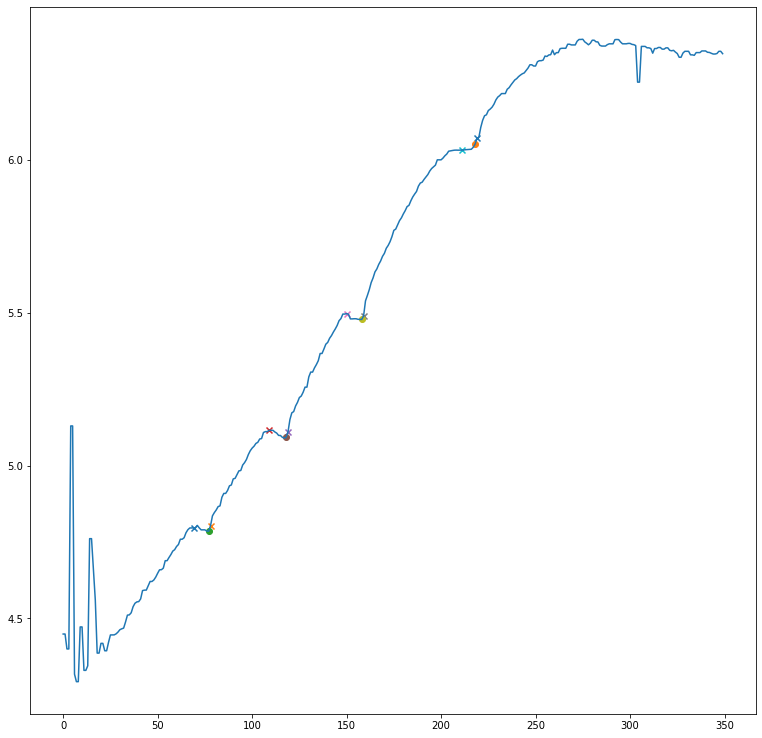

[ 94 148 184 240]
[191.  85.  94. 139. 148. 176. 185. 230. 240.]
191


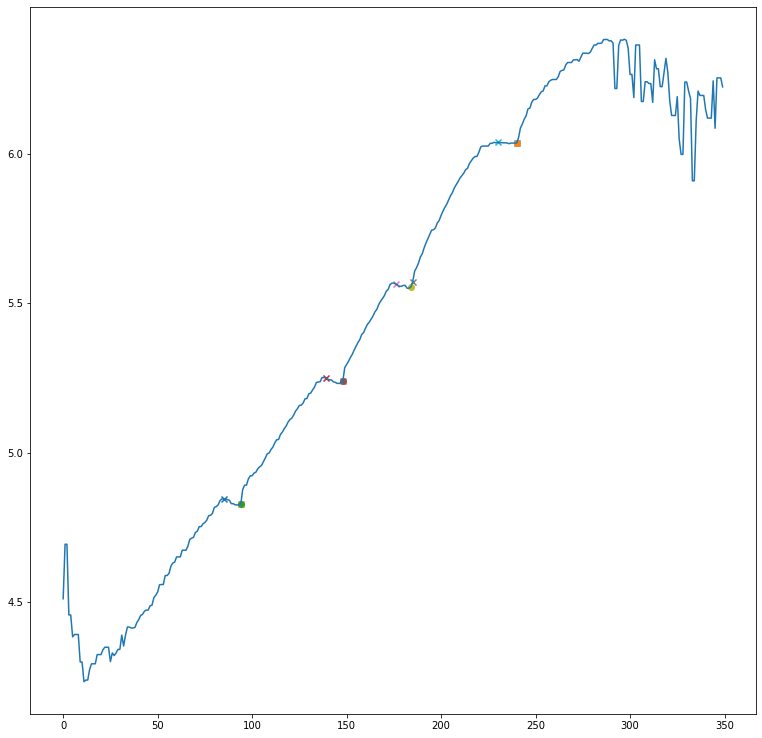

[ 85 128 168 226]
[192.  76.  86. 120. 129. 160. 168. 216. 226.]
192


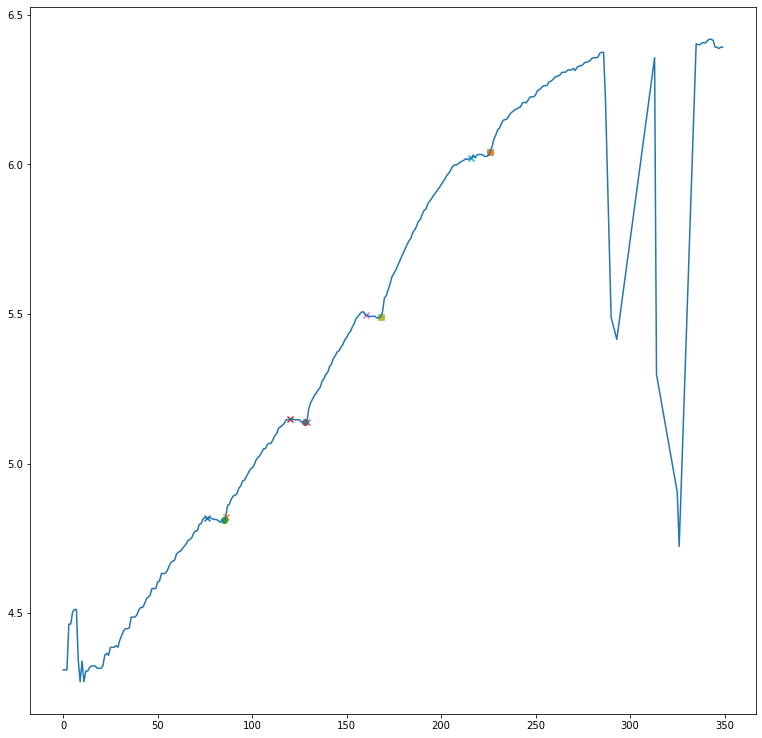

[-9223372036854775808 -9223372036854775808 -9223372036854775808
 -9223372036854775808]
[193.  61.  69.  nan  nan  nan  nan  nan  nan]
193


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 390

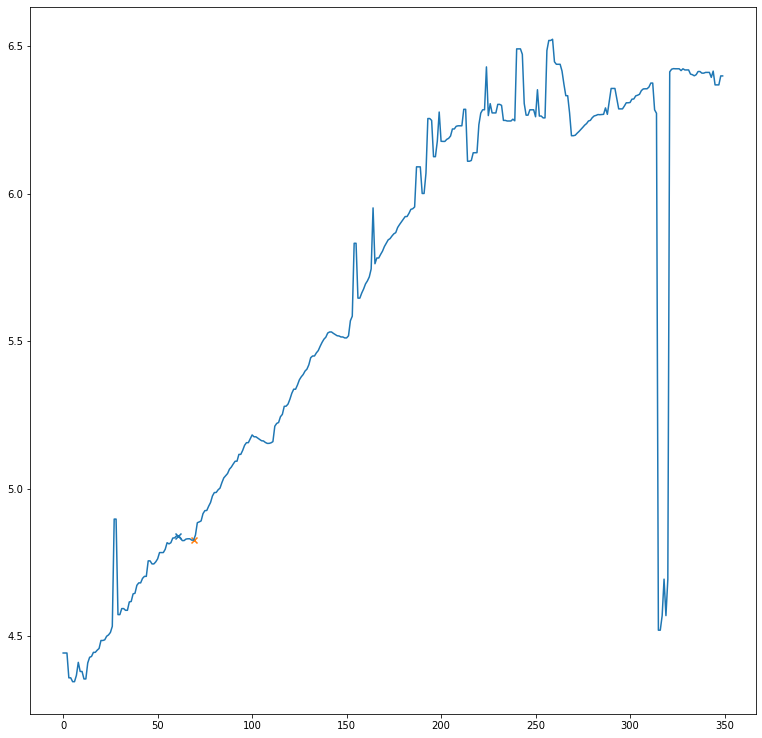

In [6]:
report_folder = "/mnt/external.data/TowbinLab/kstojanovski/20220819_Ti2_10x_RNAi_wBT160-186_25C_20220819_162820_807/analysis/report/"

matplotlib.rcParams['figure.figsize'] = [13, 13]
# output_csv = report_folder + "moults.csv"
# output_csv = "./moults.csv"
file = glob.glob(report_folder + "*" + "ch2_sobel_str_molts_nw_cor.mat")[0]

moults_dataframe = output_dataframe

def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

# print(moults_dataframe)
mat = scipy.io.loadmat(file)

vol = mat['vol']
moults = mat['ecdys'][:, 1:]

counter = 0

error = []
for p in range(190,200):
    v = vol[p, :]
    m = moults[p, :]
    m = m.astype(int)
    print(m)
    line = moults_dataframe.loc[df['Point'] == p]
    line = line.to_numpy()[0]
    print(line)
    print(p)
    # print(p)

    m1 = np.asarray((line[1], line[2])).astype(int)
    m2 = np.asarray((line[3], line[4])).astype(int)
    m3 = np.asarray((line[5], line[6])).astype(int)
    m4 = np.asarray((line[7], line[8])).astype(int)


    v = signal.medfilt(v, 3)
    log_v = np.log10(v)

    nans, x= nan_helper(log_v)
    log_v[nans]= np.interp(x(nans), x(~nans), log_v[~nans])

    plt.plot(log_v[:350])


    plt.scatter(m1[0], log_v[m1[0]], marker = "x")
    plt.scatter(m1[1], log_v[m1[1]], marker = "x")
    if not m[0] < 0:
        plt.scatter(m[0], log_v[m[0]])

    plt.scatter(m2[0], log_v[m2[0]], marker = "x")
    plt.scatter(m2[1], log_v[m2[1]], marker = "x")
    if not m[1] < 0:
        plt.scatter(m[1], log_v[m[1]])

    plt.scatter(m3[0], log_v[m3[0]], marker = "x")
    plt.scatter(m3[1], log_v[m3[1]], marker = "x")
    if not m[2] < 0:
        plt.scatter(m[2], log_v[m[2]])

    plt.scatter(m4[0], log_v[m4[0]], marker = "x")
    plt.scatter(m4[1], log_v[m4[1]], marker = "x")
    if not m[3] < 0:
        plt.scatter(m[3], log_v[m[3]])

    if not (math.isnan(m1[1])) and not (math.isnan(m[0])):
        error.append(m[0] - m1[1])
    if not (math.isnan(m2[1])) and not (math.isnan(m[1])):
        error.append(m[1] - m2[1])
    if not (math.isnan(m3[1])) and not (math.isnan(m[2])):
        error.append(m[2] - m3[1])
    if not (math.isnan(m4[1])) and not (math.isnan(m[3])):
        error.append(m[3] - m4[1])


    plt.show()

error = np.abs(error)

# plt.plot(error)

# print(error)
print("mean error :", np.mean(error))
print("median error :", np.median(error))
        